# Lab 4: Practical on SVM

- RODRIGUEZ OCEDA Ricardo
- ZIKAKPE GNALE Jean Baptiste

## 1.  An elementary SVM

    In the Euclidean plane R 2 take individuals (1, 1), (1, 5), (5, 1) and (5, 5), assigned to classes −1, 1, 1, 1.
    
    1. Manually calculate the vector (a, b) and the value of c of the maximal margin classifier straight line.
    
    We create an equation system based on the equation ax+by+c=+-1

In [40]:
A=np.matrix([[1,1,1],[1,5,1],[5,1,1]])
b=np.matrix([[-1],[1],[1]])
x = (A**-1)*b
print(x)

[[ 0.5]
 [ 0.5]
 [-2. ]]


    the obtained result is a=0.5, b=0.5, c=-2
    
    2. Implement :

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]])
y = [-1,1,1,1]
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
print(clf.support_vectors_)
print(clf.n_support_)

[[ 1.  1.]
 [ 1.  5.]
 [ 5.  1.]]
[1 2]


In [42]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,6)
yy = a * xx - clf.intercept_[0] / w[1]

[ 0.49975586  0.49975586]


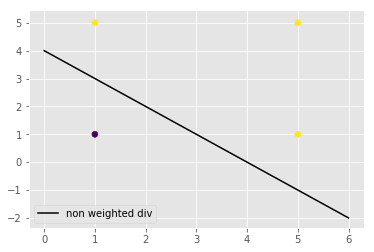

In [43]:
plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

    What is the meaning of the obtained results :
    
    We have the information of support points (three points), which are the points used to compute the support vector. Then, an array [1,2] is showed. This array means that 1 of the support values is for class 1 and two of them of class -1.
    Finally the prnt of w shows the coefficient values. The values of a and b

    3. Classify the new points (2,3) (4,5) 2,1) (1,2)

In [44]:
X_new = np.array([[2, 3], [4, 5], [2, 1], [1, 2]])

In [45]:
y_new=clf.predict(X_new)

In [46]:
y_new

array([ 1,  1, -1, -1])

    4. Recover the weights and biais

In [47]:
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(0,6)
yy = a * xx - clf.intercept_[0] / w[1]

[ 0.49975586  0.49975586]


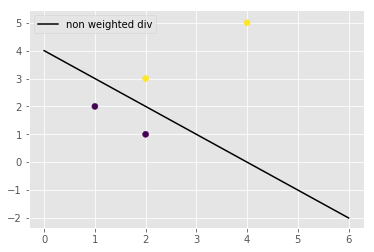

In [48]:
plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X_new[:, 0], X_new[:, 1], c = y_new)
plt.legend()
plt.show()

    5. Check the value of the margin for support vectors
    
    We verify that the result of that the function: ax + by+ c = +/- 1 is the right for each class, using the support vectors computed before

In [49]:
res1=np.dot(clf.support_vectors_[0],clf.coef_[0])+clf.intercept_
print(res1)
res3=np.dot(clf.support_vectors_[1],clf.coef_[0])+clf.intercept_
print(res3)
res4=np.dot(clf.support_vectors_[2],clf.coef_[0])+clf.intercept_
print(res4)

[-0.99934896]
[ 0.99967448]
[ 0.99967448]


In [50]:
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print(clf.coef_)
print(margin)
print(clf.intercept_[0])

[[ 0.49975586  0.49975586]]
1.41490443368
-1.99886067708


## 2. Iris

    1. Load the Iris dataset and visualize  it in 2D or 3D (using scatter)

In [51]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [62]:
X

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

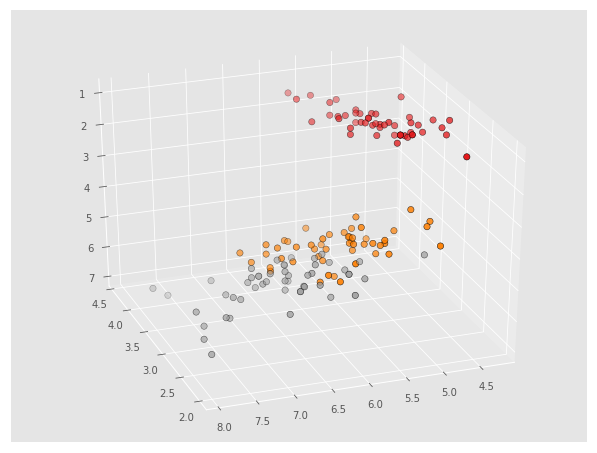

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, shuffle=True)

In [54]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
pred=clf.predict(X_test)

In [56]:
pred

array([1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 0])

In [57]:
y_test

array([1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 0])

In [68]:
 # Calcul de la précision à la main :
def calcul_prec_recall(pred,y_test):
    precisions = [0,0,0]
    recalls = [0,0,0]
    for classe in range(3):
        TP = 0
        FP = 0
        FN = 0

        for i in range(len(y_test)):
            if(y_test[i] == classe and pred[i] == classe):
                TP += 1
            if(y_test[i] == classe and pred[i] != classe):
                FN += 1
            if(pred[i] == classe and y_test[i] != classe):
                FP +=1

            if(TP+FP==0): # Pour éviter les divisions par 0
                precisions[classe] = 1
            else:
                precisions[classe] = TP/(TP+FP)
                
            if(TP + FN==0):
                recalls[classe] = 1
            else:
                recalls[classe] = TP/(TP + FN)
    return precisions, recalls


In [79]:
#prec=num tp /selecteted elementes
#recall = tp /positives (GT)

prec,recall=calcul_prec_recall(pred,y_test)
print('Precision is',np.mean(prec))
print('Recall is',np.mean(recall))

Precision is 0.966666666667
Recall is 0.960784313725


- By using class KFold from package sklearn.cross_validation, write the code a 10-crossed validation and obtain average precision and recall for each class.

In [154]:
from sklearn.model_selection import KFold
X, y = iris.data, iris.target
kfold = KFold(n_splits=10, shuffle=True)
kfold.get_n_splits(X)


def kfold_test(kernel):
    kfold_prec=[]
    kfold_recall=[]
    for train, test in kfold.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        
        if(kernel=='linear'):
            clf = svm.SVC(kernel='linear')
           
        if(kernel=='poly'):
            clf = svm.SVC(kernel='poly',degree=4)
            
        if(kernel=='rbf'):
            clf = svm.SVC(kernel='rbf')
            
        if(kernel=='sigmoid'):
            clf = svm.SVC(kernel='sigmoid')
            
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        prec,recall=calcul_prec_recall(pred,y_test)
        kfold_prec.append(prec)
        kfold_recall.append(recall)
    return np.mean(kfold_prec), np.mean(kfold_recall)
    

In [156]:
prec,recall=kfold_test('linear')
print('Linear method - Precision is',np.mean(prec))
print('Linear method - Recall is',np.mean(recall))

Linear method - Precision is 0.976666666667
Linear method - Recall is 0.980555555556


In [133]:
prec,recall=kfold_test('poly')
print('poly method - Precision is',np.mean(prec))
print('poly method - Recall is',np.mean(recall))

poly method - Precision is 0.951944444444
poly method - Recall is 0.965555555556


In [148]:
prec,recall=kfold_test('rbf')
print('rbf method - Precision is',np.mean(prec))
print('rbf method - Recall is',np.mean(recall))

rbf method - Precision is 0.981111111111
rbf method - Recall is 0.982222222222


In [155]:
prec,recall=kfold_test('sigmoid')
print('sigmoid method - Precision is',np.mean(prec))
print('sigmoid method - Recall is',np.mean(recall))

sigmoid method - Precision is 0.648888888889
sigmoid method - Recall is 0.266666666667


    According to our results the most accurate kernel is rbf. Linear and Poly kernels are also acceptable. By the other side, sigmoid kernel is the less accurate 